# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

Sprint 1

Author: Patrick Smith

Date: 19/03/2024

Contact: patrick.b.smith@gmail.com

## Table of Contents

[Inital Discovery/Problem Solving](#discovery) #1 id 

[Data Manipulation](#wrangle)

[Initial Description](#Exploratory_Data_Analysis) 

[Discovery and Cleaning](#Discovery)

[Observation 1: Reviewer_Score](#Reviewer_Score)

[Observation 2: Average_Score](#Average_Score)

[Observation 3/4: Word_Counts](#Word_Count)

[EDA_Foward](#EDA_Foward)


## Description of Variables


| Column                     | Descriptor                                                                 | Datatype |
|----------------------------|----------------------------------------------------------------------------|----------|
| Year                       | Year of observation.                                                       | int32    |
| Quarter                    | Quarter of observation (Q1=1,Q2=2,Q3=3,Q4=4).                              | object   |
| Nationality                | Nationality of individual.                                                 | object   |
| Region                     | Region of observation.                                                     | object   |
| Return type group          | Type of return.                                                            | object   |
| Return type                | Specific type of return (details not initially provided, adding for consistency). | object   |
| Age                        | Age of individual, outputted in ranges (e.g., 18+).                       | object   |
| Sex                        | Gender of individual with values for male, female, and other/unknown.      | int32    |
| Return destination group   | Destination of return.                                                     | object   |
| Number of returns          | Count of returns.                                                          | float64  |
| Visa type group            | Type of visa the individual is applying to.                                | object   |
| Applicant type             | Type of applicant.                                                         | object   |
| Case outcome               | Outcome of case. This is the dependent variable. (Issued/Rejected/Withdrawal/Resettlement). | object   |
| Decisions                  | Number of decisions made.                                                  | float64  |
| Case type                  | Type of case.                                                              | object   |
| Case outcome group         | Group of case outcome.                                                     | object   |
| UASC                       | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child. Added for consistency. | object   |
| Host Country               | Country of host, similar to Nationality.                                   | object   |
| Application type group     | Type of application grouped.                                               | object   |
| Application type           | Type of application.                                                       | object   |
| Grants                     | Number of grants.                                                          | float64  |
| Location of application    | Location where the application was submitted. Added for completeness.      | object   |
| Applications               | Number of applications.                                                    | float64  |
| Occupation                 | Occupation of individual.                                                  | object   |
| Industry                   | Industry of individual.                                                    | object   |
| Occ. major group           | Major group classification of the occupation. Added for completeness.      | object   |
| Occ. sub-major group       | Sub-major group classification of the occupation. Added for completeness.  | object   |
| Occ. minor group           | Minor group classification of the occupation. Added for completeness.      | object   |
| Occ. unit group            | Unit group classification of the occupation. Added for completeness.       | object   |
| Sex_Male                   | Male dummy set to 1-0.                                                     | object   |
| Sex_Female                 | Female dummy set to 1-0.                                                   | object   |
| Sex_Other                  | Other or NAs dummy set to 1-0.                                             | object   |

# Defaults 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#get data then do .toclipboard() 
#then you can use for charts
#.plot(kind=bar", c="8eb7ff" ? you can do specific colours that you used in canva

## Initial Objective

We are going to complete the following:

1) Read the file
2) Do an initial investigation
3) Clean the data (data wrangling)
4) Do an EDA (exploratory data analysis)
5) Plots and univariate and bivariate distribution
6) Insights and conclusions to shareholders

After, we will move on to data preprocessing and modelling on the other notebook.

## Data Wrangling 

<a id = 'wrangle'><a/>

### Merging Pathway:
returns #1 -> entries #2 -> asylum #3-> grants #4 ->  
asylum_applications #5 -> applications_jobs #6  

From oldest read data to new 1-2-3-4-5-6, data is pasted on top, so it is 6-5-4-3-2-1 unfiltered.

Takes like 30 seconds - 1 minute to compute

In [2]:
# Define the directory path
directory_path = r"C:\Users\patri\Downloads\data"

# Define the file names
returns_file_name = "returns-clean.xlsx"
entries_file_name = "entries-clean.xlsx"
asylum_file_name = "Asylum initial decisions and resettlement-clean.xlsx"
grants_file_name = "Grants of British citizenship-clean.xlsx"
asylum_applications_file_name = "asylum-applications-clean.xlsx"
grants_jobs_file_name = "grants-occupactions-visas-clean.xlsx"
application_jobs_file_name = "applications-occupactions-visas-clean.xlsx"

# Construct the full file paths
returns_file_path = os.path.join(directory_path, returns_file_name)
entries_file_path = os.path.join(directory_path, entries_file_name)
asylum_file_path = os.path.join(directory_path, asylum_file_name)
grants_file_path = os.path.join(directory_path, grants_file_name)
asylum_applications_file_path = os.path.join(directory_path, asylum_applications_file_name)
grants_jobs_file_path = os.path.join(directory_path, grants_jobs_file_name)
application_jobs_file_path = os.path.join(directory_path, application_jobs_file_name)

# Read files and set df variables per sheet
# Specifying specific columns to ensure it pulls the right columns. Without this the combination df was getting multiples of the same columns.
# Picked most columns, decided to drop the non-important ones once the data is analyzed sufficently. 
df_returns = pd.read_excel(returns_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Return type group', 'Return type', 'Age', 'Sex', 'Return destination group', 'Number of returns'])
df_entries = pd.read_excel(entries_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type group', 'Applicant type', 'Case outcome', 'Decisions'])
df_asylum = pd.read_excel(asylum_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Case type', 'Case outcome group', 'Case outcome', 'Age', 'Sex', 'Applicant type', 'UASC', 'Host Country', 'Decisions'])
df_grants = pd.read_excel(grants_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Application type group', 'Application type', 'Region', 'Nationality', 'Sex', 'Age', 'Grants'])
df_asylum_applications = pd.read_excel(asylum_applications_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex', 'Applicant type', 'UASC', 'Location of application', 'Applications'])
df_grants_jobs = pd.read_excel(grants_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Grants'])
df_application_jobs = pd.read_excel(application_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Applications'])

# Concatenate the dataframes along the rows axis
#Ignore_index is neccesary as the concatenation appeared to be giving different columns and rows based on combined indexes 
df_combined = pd.concat([df_returns, df_entries, df_asylum, df_grants, df_asylum_applications, df_grants_jobs, df_application_jobs], ignore_index=True)

# Sort the dataframe by 'Year' and 'Quarter'
# Almost all these values were populated in all the sheets so useful matching indicators
df_combined.sort_values(by=['Year', 'Quarter'], inplace=True)

# Display the resulting DataFrame
df_combined


,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
584636,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584637,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584638,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584639,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584640,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inital Discovery and Cleaning

Let's check how much missing values we have in the data:


In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069269 entries, 584636 to 827858
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067885 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              456259 non-null   object 
 13  Decisions                 45

In [ ]:
print(f"We have {clean_df.shape[0]} rows and {clean_df.shape[1]} columns with  string, floats and integers in our clean data.")

Let's check for null or missing values. 
- Looks like we are dealing with only numerical data (other than CUST_ID)
- We could potentially round the decimal places down to 3dp
- The numerical data includes floats and integers. 
- There seems to be null values present (e.g. in row 4 of `MINIMUM_PAYMENTS`)

We are assuming that the CUST_ID id the row level unique customer identifier, therefore we will set it as the dataframe index. Let's re-read the data below with that. 

In [6]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.129434
Quarter                      0.130089
Nationality                  0.130089
Region                       0.130089
Return type group           77.775471
Return type                 77.775471
Age                         49.397299
Sex                         48.651836
Return destination group    77.775471
Number of returns           77.775471
Visa type group             67.548484
Applicant type              50.822945
Case outcome                57.329821
Decisions                   57.329821
Case type                   89.781337
Case outcome group          89.781337
UASC                        83.274461
Host Country                89.781337
Application type group      87.601530
Application type            88.347366
Grants                      79.704172
Location of application     93.493125
Applications                85.320626
Occupation                  83.930143
Industry                    83.930143
Occ. major group            83.930143
Occ. sub-maj

let's check if there are any duplicates.

In [ ]:
df.duplicated().sum()/df.shape[0]*100

We are missing 1 row of info in `CREDIT_LIMIT` and 313 rows in `MINIMUM_PAYMENTS`. Let's look at these below:

In [ ]:
cc_df[cc_df['MINIMUM_PAYMENTS'].isna()]

In [ ]:
# Find the rows where minimum payments is null and payments is 0
zero_payment_index = (cc_df['MINIMUM_PAYMENTS'].isna()) & (cc_df['PAYMENTS'] == 0)

cc_df[zero_payment_index]

# Fill that with zeroes
cc_df.loc[zero_payment_index, "MINIMUM_PAYMENTS"] = 0

In [26]:
# Get the value counts for the 'Sex' column
df_combined['Sex'].value_counts()

Sex
Male                                 276873
Female                               233991
Total (pre-2009)                      30708
Unknown                                5172
Unknown Sex                            1054
M                                       610
F                                       608
Unknown / Not Given                      24
U                                         7
Data Unavailable in Source System         2
Male                                      1
Name: count, dtype: int64

There doesn't seem to be a pattern, at least immeditely. Let's investigate the distribution of minimum payments overall to at least somewhat inform us of the imputation choices. 

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(cc_df['MINIMUM_PAYMENTS'], bins = 100 )
plt.yscale('log')
plt.ylabel("Frequency (log scale)", size=13)
plt.xlabel("Minimum Payments", size=13)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(cc_df['BALANCE'], cc_df['MINIMUM_PAYMENTS'])
plt.ylabel("Minimum Payments", size=13)
plt.xlabel("Balance", size=13)
plt.show()

We can see above that there is a small relationship between balance and minimum payments. We can potentially impute our minimum payments as a percentage of Balance.

In [ ]:
# Check minimum paymnets as a proportion of Balance
balance_pct = cc_df['MINIMUM_PAYMENTS']/cc_df['BALANCE']
balance_pct[np.isfinite(balance_pct)].median()

It looks like there is a trend here as we expected. We can take the median value as our ratio.

In [ ]:
# Extract the median
median_balance_pct = balance_pct[np.isfinite(balance_pct)].median()
median_balance_pct

In [ ]:
minimum_payments_is_na = cc_df['MINIMUM_PAYMENTS'].isna()
cc_df.loc[minimum_payments_is_na, 'MINIMUM_PAYMENTS'] = cc_df.loc[minimum_payments_is_na, 'BALANCE'] * 0.444

Let's check the distribution to ensure this hasn't changed the distribution

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(cc_df['MINIMUM_PAYMENTS'], bins = 100 )
plt.yscale('log')
plt.ylabel("Frequency (log scale)", size=13)
plt.xlabel("Minimum Payments", size=13)
plt.show()

In [ ]:
# Define the mapping dictionary

# Apply the mapping to the 'Sex' column in df_combined
df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)

# For handling NaN values and other unknown values, use fillna method to replace them with a default value, for example, 3 for 'Unknown'
df_combined['Sex'] = df_combined['Sex'].fillna(3)

# Get the value counts for the 'Sex' column in df_combined
sex_counts = df_combined['Sex'].value_counts()

# Print the value counts
print(sex_counts)

#seperate into 1s and 0s


In [ ]:
df_combined['Age'].value_counts()

#bar chart - see where mean - fill

In [ ]:
df_combined['Year'].value_counts()

In [3]:
df_combined['Quarter'].value_counts()

Quarter
2023 Q3    32917
2022 Q3    32498
2022 Q4    30738
2023 Q2    30675
2023 Q1    30527
           ...  
2003 Q3     1017
2001 Q1      868
2001 Q2      783
2001 Q3      774
2001 Q4      762
Name: count, Length: 91, dtype: int64

In [4]:
# Split the 'Quarter' column into 'Year' and 'Quarter' parts
df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)

# Map the 'Quarter' part to the desired values
quarter_mapping = {'1': 1, '2': 2, '3': 3, '4': 4}
#df_combined['Quarter'] = df_combined['Quarter'].map(quarter_mapping).fillna(5).astype(int)

In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069269 entries, 584636 to 827858
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067878 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              456259 non-null   object 
 13  Decisions                 45

In [42]:
df_combined['Year'].value_counts()

Year
2022    116761
2023     94119
2021     84221
2010     52730
2009     52718
2011     50673
2015     49505
2012     49439
2018     49163
2013     49057
2016     48980
2014     48838
2017     48789
2019     48666
2007     42438
2008     42319
2006     39638
2005     37901
2020     36410
2004     13495
2002      4595
2003      4236
2001      3187
Name: count, dtype: int64

In [7]:
# Filter rows where 'Year' column is null or NaN
df_combined[df_combined['Year'].isnull()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
584635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Count the rows where 'Year' column is null or NaN
missing_year_count = df_combined['Year'].isnull().sum()

# Display the count
print("Number of rows without year inputs:", missing_year_count)


Number of rows without year inputs: 1391


ok we can just remove all the rows with no year because there is no data

In [14]:
# Remove rows with null values in the "Year" column
df_combined = df_combined.dropna(subset=['Year'])

# Check the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df_combined_cleaned.shape)

Shape of cleaned DataFrame: (1067878, 29)


In [15]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067878 entries, 584636 to 824046
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067878 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              456259 non-null   object 
 13  Decisions                 45

In [16]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           77.746522
Return type                 77.746522
Age                         49.331384
Sex                         48.584951
Return destination group    77.746522
Number of returns           77.746522
Visa type group             67.506213
Applicant type              50.758888
Case outcome                57.274239
Decisions                   57.274239
Case type                   89.768026
Case outcome group          89.768026
UASC                        83.252675
Host Country                89.768026
Application type group      87.585380
Application type            88.332188
Grants                      79.677735
Location of application     93.484649
Applications                85.301504
Occupation                  83.909211
Industry                    83.909211
Occ. major group            83.909211
Occ. sub-maj

In [17]:
df_combined['Case outcome'].value_counts()

Case outcome
Issued                                                                           198448
Refused                                                                          101804
Withdrawn                                                                         38253
Other Refusals                                                                    31930
Refugee Permission                                                                21704
Other Withdrawal                                                                  14763
Certified Refusal                                                                  9770
Lapsed                                                                             8489
3rd Country Refusal                                                                5738
Discretionary Leave                                                                5007
Non-Substantiated Withdrawal                                                       4193
Non-Compliance Refu

In [18]:
# Create a dictionary to map similar values to main categories
outcome_mapping = {
    'Refugee Permission': ['Refugee Permission', 'Temporary Refugee Permission'],
    'Issued': ['Issued', 'Humanitarian Protection'],
    'Refused': ['Refused', 'Certified Refusal', '3rd Country Refusal', 'Non-Compliance Refusal'],
    'Withdrawn': ['Withdrawn', 'Lapsed', 'Other Withdrawal', 'Non-Substantiated Withdrawal'],
    'Resettlements': [
        'Resettlement - Gateway Protection Programme',
        'Resettlement - UK Resettlement Scheme',
        'Resettlement - Vulnerable Children Resettlement Scheme',
        'Resettlement - Vulnerable Persons Resettlement Scheme',
        'Resettlement - Community Sponsorship Scheme',
        'Resettlement - Mandate Scheme',
        'Resettlement - ACRS Pathway 1 - Settled accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation',
        'Resettlement - ACRS Pathway 3 - Settled accommodation',
        'Relocation - ARAP - Settled accommodation',
        'Resettlement - ACRS Pathway 1 - Settled accommodation - Community Sponsorship',
        'Calais Leave',
        'Resettlement - Afghan route not recorded - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Interim accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Settled accommodation'
    ]
}

# Initialize an empty list to store the values not mapped to any category
other_values = []

# Iterate over the unique values in the 'Case outcome' column
for value in df_combined['Case outcome'].unique():
    # Check if the value is not found in any of the main categories
    if all(value not in similar_values for similar_values in outcome_mapping.values()):
        # Add the value to the list of other values
        other_values.append(value)

# Map the other values to the "Other" category
outcome_mapping['Other.NA'] = other_values

# Apply the mapping to the 'Case outcome' column using .loc
for main_category, similar_values in outcome_mapping.items():
    df_combined.loc[df_combined['Case outcome'].isin(similar_values), 'Case outcome'] = main_category

Leaving it set to Other.NA for now, but I'm considering changing it to something more sophisicated later.

In [19]:
df_combined['Case outcome'].value_counts()

Case outcome
Other.NA              654990
Issued                201171
Refused               120608
Withdrawn              65698
Refugee Permission     21780
Resettlements           3631
Name: count, dtype: int64

In [20]:
df_combined.sample(10)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
800790,2018,4,Sweden,EU 14,NaN,NaN,18-29,Male,NaN,NaN,...,Naturalisation based on residence,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218794,2021,3,Turkey,Europe Other,Voluntary return,Other verified returns,30 to 49,Female,Home country,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025518,2022,3,India,Asia South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,2426 - Business and related research professio...,"Professional, Scientific and Technical Activities",Professional Occupations,"Business, Media and Public Service Professionals","Business, Research and Administrative Professi...",Business and related research professionals
1008180,2022,1,India,Asia South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,5431 - Butchers,Manufacturing,Skilled Trades Occupations,"Textiles, Printing and Other Skilled Trades",Food Preparation and Hospitality Trades,Butchers
396305,2013,3,Albania,Europe Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158379,2016,1,Nigeria,Africa Sub-Saharan,Refused entry at port and subsequently departed,Departed from UK Ports,17 and under,Male,Other country,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950515,2022,4,Russia,Europe Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1123 - Production managers and directors in mi...,Mining and Quarrying,"Managers, Directors and Senior Officials",Corporate Managers and Directors,Production Managers and Directors,Production managers and directors in mining an...
899699,2021,1,Turkey,Europe Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1115 - Chief executives and senior officials,Financial and Insurance Activities,"Managers, Directors and Senior Officials",Corporate Managers and Directors,Chief Executives and Senior Officials,Chief executives and senior officials
286029,2007,4,Mongolia,Asia East,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669191,2019,3,Eritrea,Africa Sub-Saharan,NaN,NaN,30-49,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


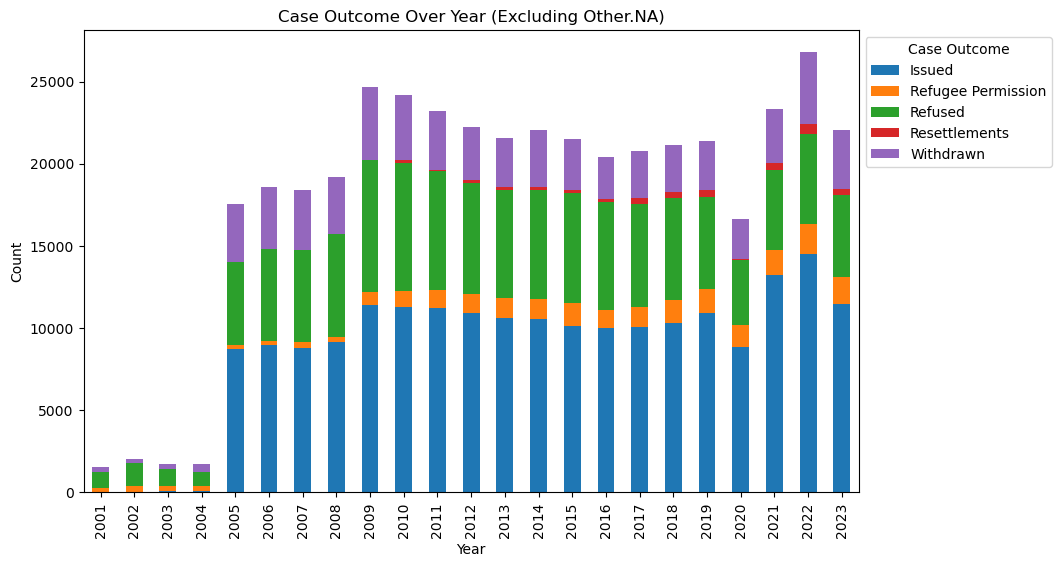

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df_combined

# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Case Outcome Over Year (Excluding Other.NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

#normalize it / percentages / ratios

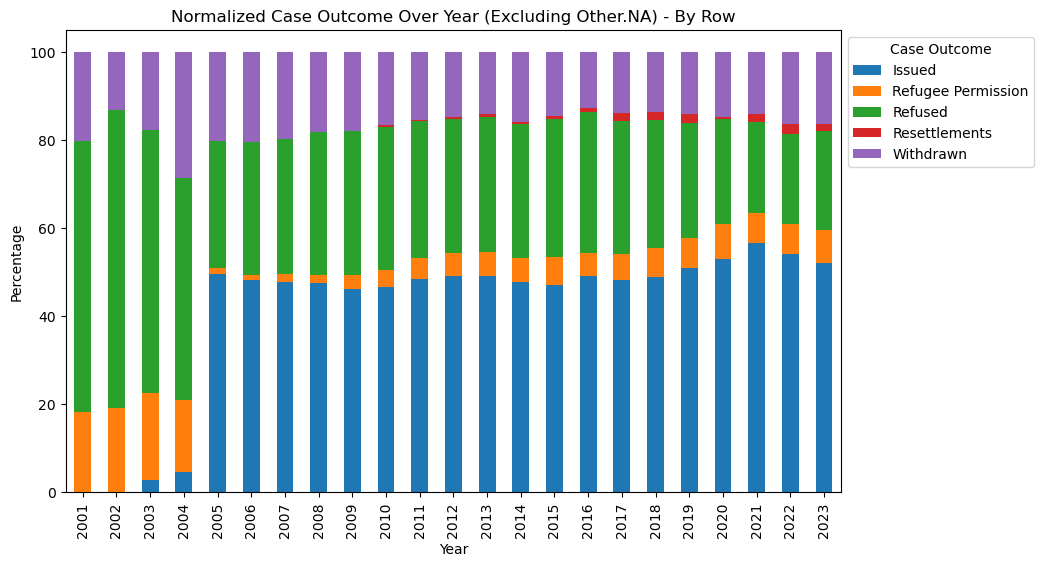

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df_combined

# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Normalize by row (percentage of each year's total)
outcome_counts_norm_row = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Normalize by column (percentage of each case outcome's total)
outcome_counts_norm_col = outcome_counts.div(outcome_counts.sum(axis=0), axis=1) * 100

# Plot the normalized data
outcome_counts_norm_row.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Case Outcome Over Year (Excluding Other.NA) - By Row')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

There was a general election in 2005 where immigration was one of the main political discussions.

The tough stuff worked, in the sense that fewer people applied for asylum in 2004 than in any year since 1998 (whether the system had got any better at sifting genuine claims from false ones is less certain). Reduced numbers, in turn, meant a calmer electorate. Polls by MORI, a pollster, show that the proportion of Britons citing immigration and race as one of the two most important issues facing the nation declined gradually from a pre-campaign peak of 39% in May 2002 to 26% in January 2005. It then shot up again when Labour and the Tories unveiled their policies.


REF: https://www.encyclopedia.com/humanities/applied-and-social-sciences-magazines/uk-immigration-and-2005-general-election

In [40]:
df_combined['Case outcome group'].value_counts()

Case outcome group
Refused                 52126
Grant of Protection     28358
Withdrawn               19683
Grant of Other Leave     9098
Name: count, dtype: int64

In [ ]:
df_combined.info()

In [ ]:
df_combined['Nationality'].value_counts()

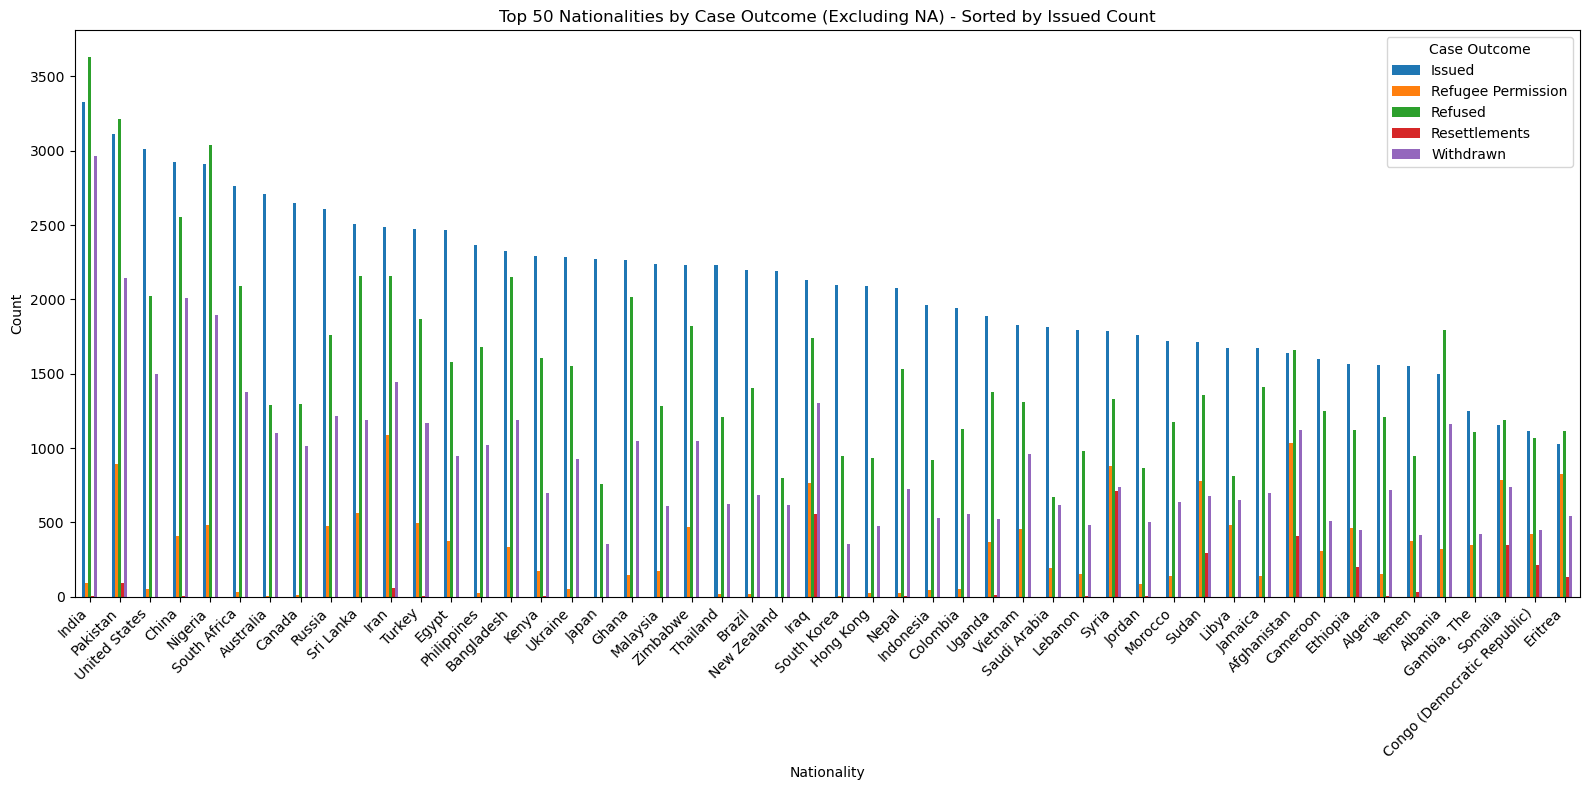

In [25]:

# Filter the dataframe to exclude rows where 'Case outcome' is 'NA'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Nationality' and 'Case outcome' and count occurrences
grouped_counts = filtered_df.groupby(['Nationality', 'Case outcome']).size().unstack(fill_value=0)

# Get the top 50 nationalities by total count across all case outcomes
top_50_nationalities = grouped_counts.sum(axis=1).nlargest(50).index

# Filter the grouped counts dataframe to include only the top 50 nationalities
grouped_counts_top_50 = grouped_counts.loc[top_50_nationalities]

# Sort the data by the "Issued" count in descending order
grouped_counts_top_50_sorted = grouped_counts_top_50.sort_values(by='Issued', ascending=False)

# Plot the sorted data
grouped_counts_top_50_sorted.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Top 50 Nationalities by Case Outcome (Excluding NA) - Sorted by Issued Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


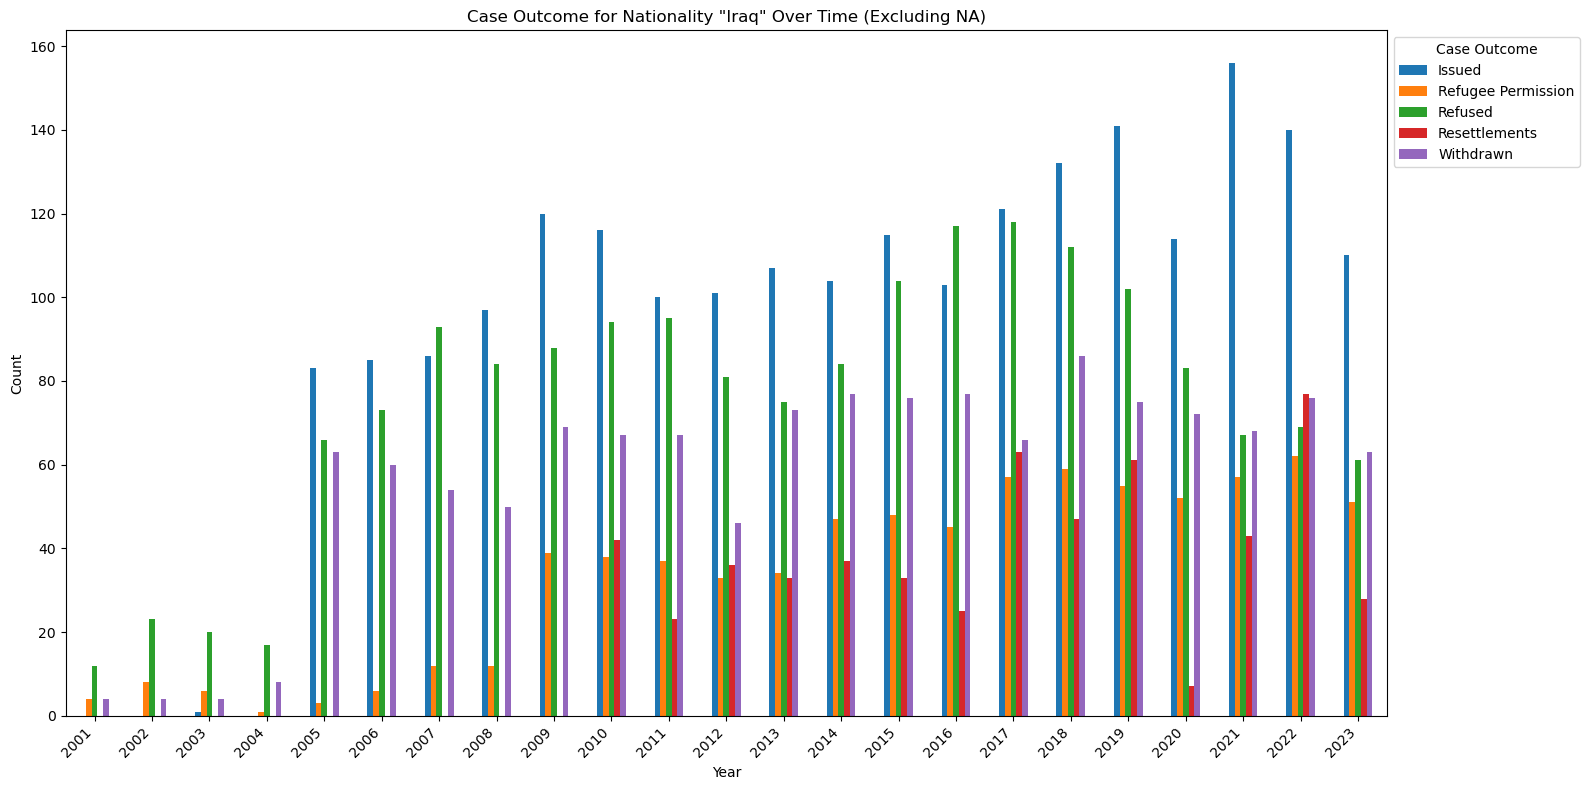

In [26]:
# Filter the dataframe to include only rows where 'Nationality' is 'Iraq' and 'Case outcome' is not 'Other.NA'
filtered_df_iraq = df_combined[(df_combined['Nationality'] == 'Iraq') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_iraq = filtered_df_iraq.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_iraq.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Iraq" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The Iraq War (Arabic: حرب العراق, romanized: ḥarb ālʿirāq) was a protracted armed conflict in Iraq from 2003 to 2011. It began with the invasion of Iraq by the United States-led coalition that overthrew the Ba'athist government of Saddam Hussein. The conflict continued for much of the next decade as an insurgency emerged to oppose the coalition forces and the post-invasion Iraqi government. US troops were officially withdrawn in 2011. 

REF: https://en.wikipedia.org/wiki/Iraq_War

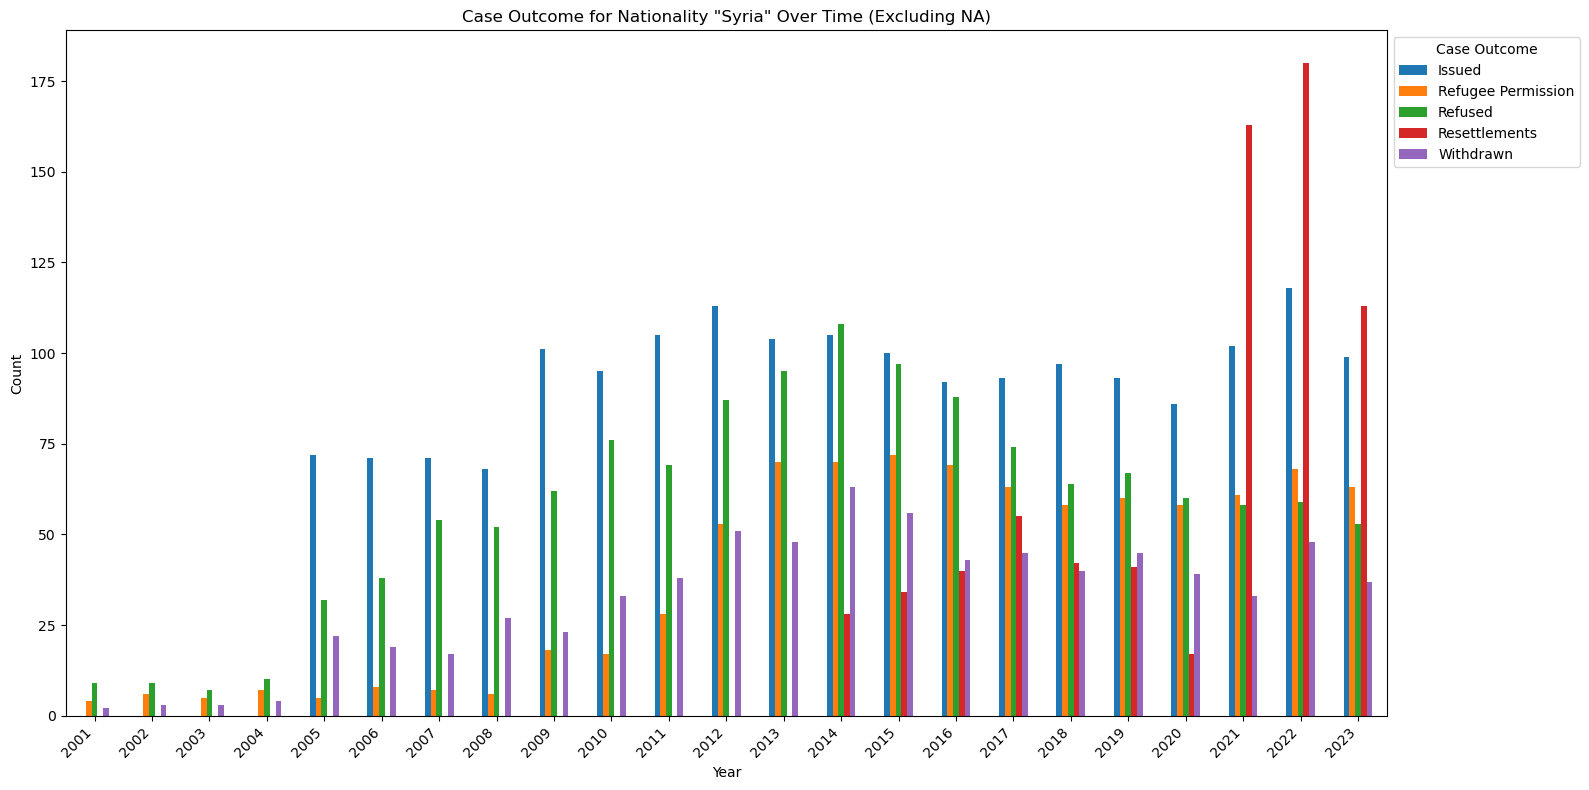

In [27]:
# Filter the dataframe to include only rows where 'Nationality' is 'Syria' and 'Case outcome' is not 'Other.NA'
filtered_df_syria = df_combined[(df_combined['Nationality'] == 'Syria') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_syria = filtered_df_syria.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_syria.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Syria" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The Syrian civil war (Arabic: ٱلْحَرْبُ ٱلْأَهْلِيَّةُ ٱلسُّورِيَّةُ, romanized: al-ḥarb al-ʾahlīyah al-sūrīyah) is an ongoing multi-sided conflict in Syria involving various state-sponsored and non-state actors. In March 2011, popular discontent with the rule of Bashar al-Assad triggered large-scale protests and pro-democracy rallies across Syria, as part of the wider Arab Spring protests in the region. After months of crackdown by governments security apparatus, various armed rebel groups such as the Free Syrian Army began forming across the country, marking the beginning of the Syrian insurgency. By mid-2012, the crisis had escalated into a full-blown civil war.

Receiving arms from NATO and GCC states, rebel forces initially made significant advances against the government forces, who were receiving arms from Iran and Russia. Rebels captured the regional capitals of Raqqa in 2013 and Idlib in 2015. Consequently, in September 2015, Russia launched a military intervention in support of the government, shifting the balance of the conflict. By late 2018, all rebel strongholds, except parts of Idlib region, had fallen to the government forces. 

REF: https://en.wikipedia.org/wiki/Syrian_civil_war

In [29]:
# Step 1: Filter the dataframe to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index

# Step 2: Iterates for top 50. Calculates counts for refused, withdrawn, issued, and refugee permission cases for each nationality
rejection_data = []
for nationality in top_50_nationalities:
    nationality_data = df_combined[df_combined['Nationality'] == nationality]
    refused_count = nationality_data[nationality_data['Case outcome'] == 'Refused'].shape[0]
    withdrawn_count = nationality_data[nationality_data['Case outcome'] == 'Withdrawn'].shape[0]
    issued_count = nationality_data[nationality_data['Case outcome'] == 'Issued'].shape[0]
    refugee_permission_count = nationality_data[nationality_data['Case outcome'] == 'Refugee Permission'].shape[0]
    
    # Step 3: Calculates total - issued + refugee permission 
    total_issued_refugee_permission = issued_count + refugee_permission_count

    # Step 4: Calculates total - total refused + withdrawn
    total_refused_withdrawn = refused_count + withdrawn_count
    
    # Step 5: Calculate the rejection ratio
    rejection_ratio = round((refused_count / total_issued_refugee_permission), 2)

    # Step 6: Calculate the total rejection ratio (including withdrawals)
    total_rejection_ratio = round((total_refused_withdrawn / total_issued_refugee_permission), 2)
    
    # Step 7: Append the data to the list
    rejection_data.append((nationality, refused_count, withdrawn_count, issued_count, refugee_permission_count, total_issued_refugee_permission, rejection_ratio, total_rejection_ratio))

# Display the results in a DataFrame
rejection_df = pd.DataFrame(rejection_data, columns=['Nationality', 'Refused', 'Withdrawn', 'Issued', 'Refugee Permission', 'Total Issued + Refugee Permission', 'Rejection Ratio', 'Total Rejection Ratio'])
print(rejection_df)


                    Nationality  Refused  Withdrawn  Issued  \
0                         India     3628       2964    3330   
1                      Pakistan     3214       2143    3115   
2                 United States     2023       1500    3013   
3                       Nigeria     3037       1897    2913   
4                         China     2557       2011    2926   
5                  South Africa     2088       1378    2763   
6                        Turkey     1869       1168    2471   
7                          Iran     2154       1443    2485   
8                     Sri Lanka     2154       1190    2509   
9                        Russia     1758       1217    2608   
10                       Brazil     1401        684    2196   
11                   Bangladesh     2151       1192    2324   
12                         Iraq     1738       1305    2132   
13                  Philippines     1680       1020    2365   
14                        Ghana     2016       1046    

In [ ]:
import matplotlib.pyplot as plt

# Sort the rejection data by rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Rejection Ratio'], color='skyblue')
plt.xlabel('Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rejection ratio at the top
plt.tight_layout()
plt.show()


In [ ]:
# Sort the rejection data by total rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Total Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Total Rejection Ratio'], color='skyblue')
plt.xlabel('Total Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Total Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest total rejection ratio at the top
plt.tight_layout()
plt.show()


In [ ]:
df_combined.info()

In [ ]:
df_combined['Return type'].value_counts()
#acceptance / refusals - positive vs. negative wnv
#hypothesis testing top 50 

In [ ]:
df_combined['Return type group'].value_counts()

Return type group is already filtered, so we can drop Return type

In [ ]:
# Drop the 'Return type' column from df_combined
df_combined.drop(columns=['Return type'], inplace=True)

In [ ]:
df_combined.info()

In [ ]:
df_combined['Applicant type'].value_counts()

In [ ]:
df_combined['Location of application'].value_counts()

This is not neccesary for anything. Drop.

In [ ]:
# Drop the 'Location of application' column from df_combined
df_combined.drop(columns=['Location of application'], inplace=True)

In [5]:
df_combined['Host Country'].value_counts()

Host Country
Asylum case - N/A                   105410
Resettlement (Pre-2021 Q1) - N/A      2215
Afghan resettlement case - N/A         516
Egypt                                  224
Jordan                                 174
Lebanon                                169
Turkey                                 163
Iraq                                   130
Kenya                                   45
Malaysia                                41
Syria                                   36
Iran                                    36
Thailand                                26
Indonesia                               20
Sri Lanka                               18
India                                   11
Pakistan                                 8
Niger                                    7
Burundi                                  7
Kyrgyzstan                               3
Gambia                                   2
Tunisia                                  1
Cayman Islands                           

This might be helpful for 'Asylum case' - to compare with 'Nationality'

In [8]:
# Update values in the 'Host Country' column based on new categories
df_combined['Host Country'] = df_combined['Host Country'].replace({
    'Resettlement (Pre-2021 Q1) - N/A': 'Resettlement',
    'Afghan resettlement case - N/A': 'Resettlement',
    'Asylum case - N/A': 'Asylum case - N/A'
})


In [9]:
df_combined['Host Country'].value_counts()

Host Country
Asylum case - N/A       105410
Resettlement              2731
Egypt                      224
Jordan                     174
Lebanon                    169
Turkey                     163
Iraq                       130
Kenya                       45
Malaysia                    41
Syria                       36
Iran                        36
Thailand                    26
Indonesia                   20
Sri Lanka                   18
India                       11
Pakistan                     8
Niger                        7
Burundi                      7
Kyrgyzstan                   3
Gambia                       2
Tunisia                      1
Cayman Islands               1
Libya                        1
Syrian Arab Republic         1
Name: count, dtype: int64

In [13]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069269 entries, 584636 to 827858
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067885 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              456259 non-null   object 
 13  Decisions                 45

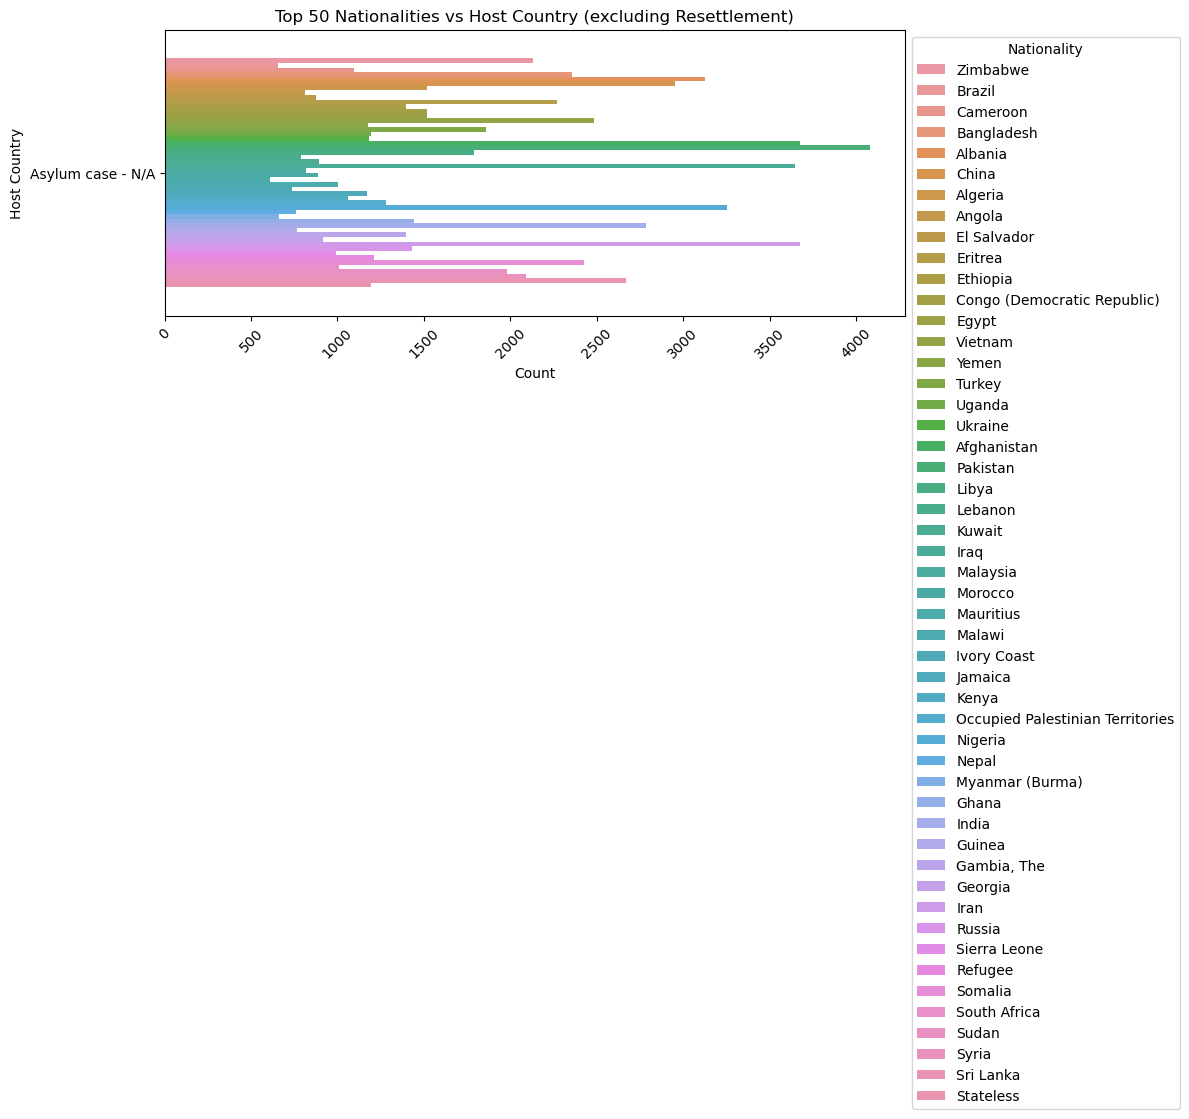

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index
filtered_df = df_combined[df_combined['Nationality'].isin(top_50_nationalities)]

# Filter the filtered DataFrame to exclude rows where 'Host Country' is 'Resettlement'
filtered_df = filtered_df[filtered_df['Host Country'] != 'Resettlement']

# Sort the filtered DataFrame by the count of 'Asylum case - N/A' from highest to lowest
filtered_df = filtered_df.sort_values(by=filtered_df.columns[0], ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
sns.countplot(y='Host Country', hue='Nationality', data=filtered_df, order=filtered_df['Host Country'].value_counts().index)

# Set the title and labels
plt.title('Top 50 Nationalities vs Host Country (excluding Resettlement)')
plt.xlabel('Count')
plt.ylabel('Host Country')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Nationality', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [30]:
df_combined['Host Country'].value_counts()

Host Country
Asylum case - N/A                   105410
Resettlement (Pre-2021 Q1) - N/A      2215
Afghan resettlement case - N/A         516
Egypt                                  224
Jordan                                 174
Lebanon                                169
Turkey                                 163
Iraq                                   130
Kenya                                   45
Malaysia                                41
Syria                                   36
Iran                                    36
Thailand                                26
Indonesia                               20
Sri Lanka                               18
India                                   11
Pakistan                                 8
Niger                                    7
Burundi                                  7
Kyrgyzstan                               3
Gambia                                   2
Tunisia                                  1
Cayman Islands                           

In [31]:
df_combined['Industry'].value_counts()

Industry
Professional, Scientific and Technical Activities                                        31042
Education                                                                                16535
Financial and Insurance Activities                                                       16028
Information and Communications                                                           15254
Human Health and Social Work Activities                                                  15190
Manufacturing                                                                            15170
Arts, Entertainment and Recreation                                                       12976
Administrative and Support Service Activities                                             8085
Wholesale and retail trade; repair of motor vehicles and motorcycles                      7143
Other Service Activities                                                                  6806
Construction                             

In [16]:
df_combined['Occupation'].value_counts()

Occupation
2136 - Programmers and software development professionals        7861
2423 - Management consultants and business analysts              7012
3545 - Sales accounts and business development managers          5691
3534 - Finance and investment analysts and advisers              4510
2135 - IT business analysts, architects and systems designers    4500
                                                                 ... 
2441 - Public service administrative professionals                  2
3551 - Conservation and environmental protection officers           2
6215 - Rail travel assistants                                       2
9259 - Elementary sales occupations n.e.c.                          1
9231 - Window cleaners                                              1
Name: count, Length: 324, dtype: int64

Industry has better info than this. We can remove Occ. major group

In [32]:
# Drop the 'Occ. major group' column from df_combined
df_combined.drop(columns=['Occ. major group'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_22552\1279933333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Occ. major group'], inplace=True)


In [33]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067878 entries, 584636 to 824046
Data columns (total 28 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067878 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              1067878 non-null  object 
 13  Decisions                 45

In [21]:
df_combined['Occ. sub-major group'].value_counts()

Occ. sub-major group
Science, Research, Engineering and Technology Professionals    42044
Business, Media and Public Service Professionals               30204
Business and Public Service Associate Professionals            25956
Corporate Managers and Directors                               19627
Culture, Media and Sports Occupations                          11047
Health Professionals                                           10591
Caring Personal Service Occupations                             5209
Textiles, Printing and Other Skilled Trades                     3620
Science, Engineering and Technology Associate Professionals     3399
Teaching and Educational Professionals                          3384
Health and Social Care Associate Professionals                  2637
Other Managers and Proprietors                                  2438
Administrative Occupations                                      2353
Skilled Metal, Electrical and Electronic Trades                 2325
Skilled Agric

Industry is better. Remove this.

In [34]:
# Drop the 'Occ. sub-major group' column from df_combined
df_combined.drop(columns=['Occ. sub-major group'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_22552\3302484716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Occ. sub-major group'], inplace=True)


In [35]:
df_combined['Occ. minor group'].value_counts()

Occ. minor group
Information Technology and Telecommunications Professionals    18653
Business, Research and Administrative Professionals            16217
Engineering Professionals                                      14024
Sales, Marketing and Related Associate Professionals           12003
Business, Finance and Related Associate Professionals          10998
                                                               ...  
Conservation Associate Professionals                               2
Therapists                                                         2
Protective Service Officers                                        2
Business and Statistical Professionals                             2
Elementary Sales Occupations                                       1
Name: count, Length: 97, dtype: int64

'Occupaction' looks better. This appears redundant. Drop

In [36]:
# Drop the 'Occ. minor group' column from df_combined
df_combined.drop(columns=['Occ. minor group'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_22552\3687033424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Occ. minor group'], inplace=True)


In [37]:
df_combined['Occ. unit group'].value_counts()

Occ. unit group
Programmers and software development professionals        7861
Management consultants and business analysts              7012
Sales accounts and business development managers          5691
Finance and investment analysts and advisers              4510
IT business analysts, architects and systems designers    4500
                                                          ... 
Management accountants                                       2
Security managers                                            2
Rail travel assistants                                       2
Window cleaners                                              1
Elementary sales occupations n.e.c.                          1
Name: count, Length: 320, dtype: int64

In [38]:
# Again, same as occupaction. Can drop.
# Drop the 'Occ. unit group' column from df_combined
df_combined.drop(columns=['Occ. unit group'], inplace=True)

C:\Users\patri\AppData\Local\Temp\ipykernel_22552\1745417818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['Occ. unit group'], inplace=True)


In [39]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067878 entries, 584636 to 824046
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067878 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              1067878 non-null  object 
 13  Decisions                 45

In [41]:
df_combined['Case outcome'].value_counts()

Case outcome
Other.NA              654990
Issued                201171
Refused               120608
Withdrawn              65698
Refugee Permission     21780
Resettlements           3631
Name: count, dtype: int64

In [ ]:
nationality_counts_alphabetical = df_combined['Nationality'].value_counts().sort_index()

nationality_counts_alphabetical

# Save the nationality counts to a CSV file
nationality_counts_alphabetical.to_csv('nationality_counts.csv')

In [ ]:
# Convert the Series to a DataFrame
nationality_counts_df = nationality_counts_alphabetical.reset_index()

# Rename the columns
nationality_counts_df.columns = ['Nationality', 'Count']

# Save the DataFrame to a CSV file
nationality_counts_df.to_csv('nationality_counts.csv', index=False)


In [ ]:
nationality_counts_df

In [ ]:
df_combined.sample(30)

#evident that grants and applications are the same and should be combined
#age ranges
#location of application - can number or remove



In [ ]:
# Assuming df_combined is your DataFrame containing the columns 'Grants' and 'Applications'

# Fill NaN values with 0 in both 'Grants' and 'Applications' columns
df_combined['Grants'].fillna(0, inplace=True)
df_combined['Applications'].fillna(0, inplace=True)
df_combined['Decisions'].fillna(0, inplace=True)

# Concatenate the two numerical columns into a new column named 'Total'
df_combined['Total Grants & Applications & Decisions'] = df_combined['Grants'] + df_combined['Applications'] + df_combined['Decisions']



In [ ]:
df_combined['Total Grants & Applications & Decisions'].value_counts()

In [ ]:
df_combined.drop(columns=['Decisions'], inplace=True)

In [ ]:
df_combined.sample(30)

In [ ]:
df_combined.info()

In [ ]:
df_combined['Decisions'].value_counts()

In [ ]:
df_combined['Grants'].value_counts()

In [ ]:
df_combined['Applications'].value_counts()

In [ ]:
#sanity check
df_combined['Total Grants & Applications & Decisions'].value_counts()